In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../tools/')

In [2]:
from feature_format import featureFormat , targetFeatureSplit

In [3]:
class StrToBytes:
    def __init__(self, fileobj):
        self.fileobj = fileobj
    def read(self, size):
        return self.fileobj.read(size).encode()
    def readline(self, size=-1):
        return self.fileobj.readline(size).encode()

In [66]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load(StrToBytes(open('../final_project/final_project_dataset.pkl','r')))
data_dict.pop('TOTAL',0)
data_dict

{'METTS MARK': {'salary': 365788,
  'to_messages': 807,
  'deferral_payments': 'NaN',
  'total_payments': 1061827,
  'loan_advances': 'NaN',
  'bonus': 600000,
  'email_address': 'mark.metts@enron.com',
  'restricted_stock_deferred': 'NaN',
  'deferred_income': 'NaN',
  'total_stock_value': 585062,
  'expenses': 94299,
  'from_poi_to_this_person': 38,
  'exercised_stock_options': 'NaN',
  'from_messages': 29,
  'other': 1740,
  'from_this_person_to_poi': 1,
  'poi': False,
  'long_term_incentive': 'NaN',
  'shared_receipt_with_poi': 702,
  'restricted_stock': 585062,
  'director_fees': 'NaN'},
 'BAXTER JOHN C': {'salary': 267102,
  'to_messages': 'NaN',
  'deferral_payments': 1295738,
  'total_payments': 5634343,
  'loan_advances': 'NaN',
  'bonus': 1200000,
  'email_address': 'NaN',
  'restricted_stock_deferred': 'NaN',
  'deferred_income': -1386055,
  'total_stock_value': 10623258,
  'expenses': 11200,
  'from_poi_to_this_person': 'NaN',
  'exercised_stock_options': 6680544,
  'from_

In [5]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


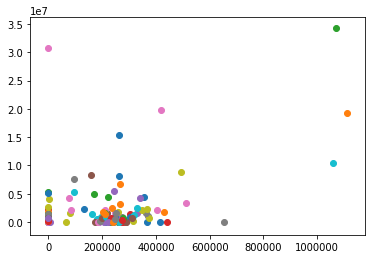

In [6]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [7]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [8]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
pred = clf.fit_predict(finance_features)

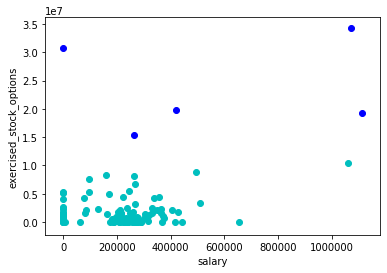

In [9]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print ("no predictions object named pred found, no clusters to plot")

In [10]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2,feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


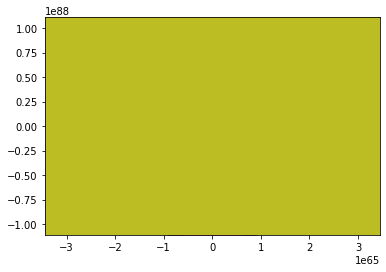

In [11]:
for f1, f2,f3 in finance_features:
    plt.scatter( f1, f2,f3)
plt.show()

In [12]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
pred = clf.fit_predict(finance_features)

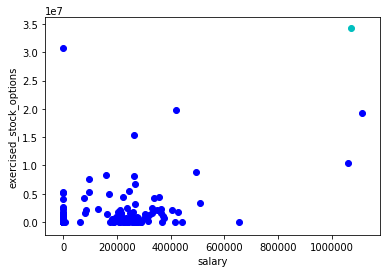

In [13]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print ("no predictions object named pred found, no clusters to plot")

In [14]:
e_stock_opt = []

for x in data_dict:
    val = data_dict[x]['exercised_stock_options']
    if val =='NaN':
        continue
    e_stock_opt.append(val)


In [15]:
print(min(e_stock_opt))
print(max(e_stock_opt))

3285
34348384


In [16]:
salary = []

for x in data_dict:
    val = data_dict[x]['salary']
    if val =='NaN':
        continue
    salary.append(val)


In [57]:
print(min(salary))
print(max(salary))

477.0
1111258.0


In [58]:
salary = []
e_stock_opt = []
for x in data_dict:
    val = data_dict[x]['salary']
    if val =='NaN':
        continue
    salary.append(float(val))
    if data_dict[x]['exercised_stock_options'] =='NaN':
        continue
    e_stock_opt.append(float(data_dict[x]['exercised_stock_options']))


In [59]:
min_salary = min(salary)
max_salary = max(salary)
min_e_stk  = min(e_stock_opt)
max_e_stk  = max(e_stock_opt)
min_max_sal = np.array([[min_salary],[200000.0],[max_salary]])
min_max_stk = np.array([[min_e_stk],[1000000.0],[max_e_stk]])
print(min_max_sal)
print(min_max_stk)

[[4.770000e+02]
 [2.000000e+05]
 [1.111258e+06]]
[[1.7378000e+04]
 [1.0000000e+06]
 [3.4348384e+07]]


In [60]:
from sklearn.preprocessing import MinMaxScaler
objscl = MinMaxScaler()
objstk = MinMaxScaler()
scal_salary_data = objscl.fit_transform(min_max_sal)
scal_stk_data = objstk.fit_transform(min_max_stk)

In [32]:
scal_salary_data

array([[0.        ],
       [0.17962407],
       [1.        ]])

In [61]:
scal_stk_data

array([[0.      ],
       [0.028622],
       [1.      ]])

In [72]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )
finance_features

[array([365788.,      0.]),
 array([ 267102., 6680544.]),
 array([ 170941., 4890344.]),
 array([     0., 651850.]),
 array([ 243293., 5538001.]),
 array([267093.,      0.]),
 array([     0., 493489.]),
 array([ 370448., 1104054.]),
 array([374125., 608750.]),
 array([197091., 880290.]),
 array([ 130724., 2282768.]),
 array([248546., 765313.]),
 array([257486.,      0.]),
 array([      0., 2218275.]),
 array([     0., 372205.]),
 array([288542.,      0.]),
 array([ 251654., 1056320.]),
 array([288558., 185063.]),
 array([63744.,     0.]),
 array([      0., 1030329.]),
 array([ 357091., 4346544.]),
 array([271442.,  81042.]),
 array([   0., 3285.]),
 array([ 304110., 1441898.]),
 array([187922.,      0.]),
 array([ 213625., 1465734.]),
 array([ 249201., 1635238.]),
 array([    0., 98718.]),
 array([231330.,      0.]),
 array([182245., 601438.]),
 array([211788.,      0.]),
 array([     0., 850477.]),
 array([224305.,      0.]),
 array([273746.,      0.]),
 array([ 339288., 4158995.]),
 a

In [86]:
salar_Data = [x[0] for x in finance_features]
stock_Data = [x[1] for x in finance_features]
min_salary = min(salar_Data)
max_salary = max(salar_Data)
min_e_stk  = min(stock_Data)
max_e_stk  = max(stock_Data)
min_max_sal = np.array([[min_salary],[200000.0],[max_salary]])
min_max_stk = np.array([[min_e_stk],[1000000.0],[max_e_stk]])
print(min_max_sal)
print(min_max_stk)

[[      0.]
 [ 200000.]
 [1111258.]]
[[       0.]
 [ 1000000.]
 [34348384.]]


In [87]:
from sklearn.preprocessing import MinMaxScaler
objscl = MinMaxScaler()
objstk = MinMaxScaler()
scal_salary_data = objscl.fit_transform(min_max_sal)
scal_stk_data = objstk.fit_transform(min_max_stk)
scal_salary_data

array([[0.        ],
       [0.17997621],
       [1.        ]])

In [88]:
scal_stk_data

array([[0.        ],
       [0.02911345],
       [1.        ]])